# 活性化関数の勉強（2017/10/26）    
仕事上でVGG16を実装する機会があり、活性化関数が気になったので色んな活性化関数をグラフにしました。
  
## 参考サイト  
[https://qiita.com/namitop/items/d3d5091c7d0ab669195f]  
## 1. ステップ関数  
- 単純パーセプトロンによく使用される活性化関数  
- 非線形  
- 階段関数  
  
### 例：入力した値が0以下のとき0になり、0より大きいときに1になるステップ関数  

In [2]:
%config IPCompleter.greedy=True

In [3]:
import numpy as np
import matplotlib.pylab as plt

In [9]:
def step_function(x_array):
    y = []
    for x in x_array:
        if x <= 0:
            y.append(0)
        else:
            y.append(1)
    
    return y

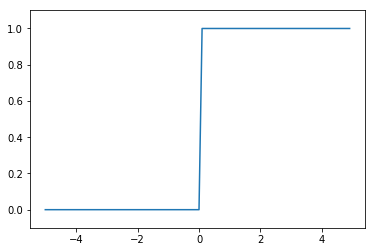

In [10]:
x_array = np.arange(-5, 5, 0.1)
y = step_function(x_array)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 2. シグモイド関数  
マークダウンで分数がうまく書けない・・・  

```math
\frac{1}{1+e^-x}
```  
  
- 入力した値が大きければ大きいほど1に近づき、小さければ小さいほど0に近づく
- 多層パーセプトロン（NN）に使われる  
- 非線形  
  
### グラフにしてみる  

In [12]:
def sigmoid(x_array):
    y = []
    for x in x_array:
         y.append(1/(1 + np.exp(-x)))
    
    return y

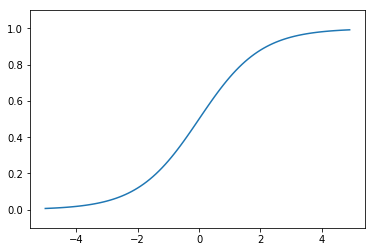

In [13]:
x_array = np.arange(-5, 5, 0.1)
y = sigmoid(x_array)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3. ReLU関数  
- Refleced Linear Unit rectifier（正規化線形関数）  
- wikipediaの活性化関数のページによると、現在最良の活性化関数らしい。    
- 入力が0以下のときは0を返し、それ以外のときは入力をそのまま返却する関数  
  
### グラフにしてみる

In [14]:
def relu(x_array):
    y = []
    for x in x_array:
        if x > 0:
            y.append(x)
        else:
            y.append(0)
            
    return y

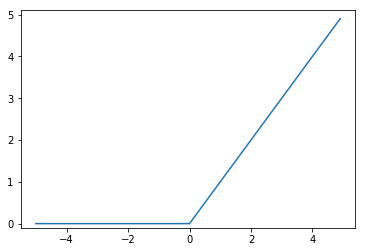

In [16]:
x_array = np.arange(-5, 5, 0.1)
y = relu(x_array)
plt.plot(x, y)
plt.ylim(-0.1, 5.1)
plt.show()

## 4. 恒等関数  
- 一般的に出力層で使用される活性化関数。ということは、これまでの活性化関数は出力層以外でよく使用されるってことかな？  
- 入力と同じ値を返却する関数  
- 回帰問題で使用される  
  
### グラフにしてみる     

In [24]:
def identity_function(x_array):
    y = []
    for x in x_array:
        y.append(x)

    return y

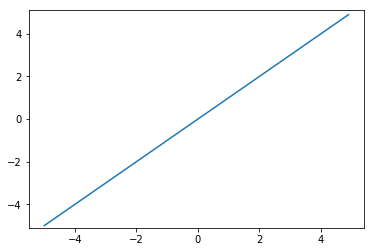

In [25]:
x_array = np.arange(-5, 5, 0.1)
y = identity_function(x_array)
plt.plot(x, y)
plt.ylim(-5.1, 5.1)
plt.show()

## 5. ソフトマックス関数  
- 恒等関数同様、出力層で使用される活性化関数  
- 分類問題で使用される  
- 出力層のユニット（＝分類問題のクラスに相当）に属する確率を出力する  
  
### グラフにしてみる

In [43]:
def softmax(x_array):
    y = []
    x_sum = np.sum(np.exp(x_array))
    
    for x in x_array:
        y.append(np.exp(x)/x_sum)
    
    return y

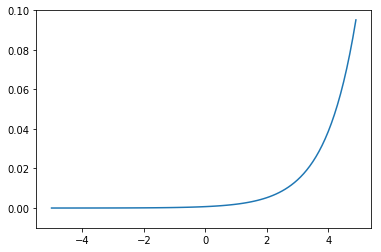

In [44]:
x_array = np.arange(-5, 5, 0.1)
y = softmax(x_array)
plt.plot(x, y)
plt.ylim(-0.01, 0.1)
plt.show()

### なぜ多層パーセプトロンで線形の活性化関数を使わないのか  
- 多層の意味がなくなるから  
- 意味がないとは、隠れ層のあるネットワークである意味がなくなること（隠れ層とは？）  
  
### 例：線形関数：h(x) = c*x を3層重ねる  
- y = h(h(h(x)))  
- y = h(h(c*x))  
- y = h(c\*c\*x)  
- y = c\*c\*c\*x ←これは隠れ層がない状態らしい  